# Project 1: Helicopter Prison Breaks

For this project, we will gather data from a Wikipedia article about inmates that have attempted to escape prison by helicopter. 

The purpose of the project is to learn how to gather real data from the internet, organize the data and complete some basic analysis. This project fulfills a requirement in the Introduction to Python Programming course for the Data Analyst in Python track.

**The objective is to answer the following questions:**

1- Which year did the most helicopter prison break attempts occur?

2- Which country do the most attempted helicopter prison breaks occur?

3- What country has had the highest number of successful helicopter prison escapes?

## Import Modules

In [28]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.display import display, HTML

## Collect Data

The `pd.read_html` function is used to extract data from the second table at the specified url.

Next, we use `dt.to_numpy().tolist()` to convert the pandas dataframe to a list of lists and assign to the variable `data`.

In [29]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"

df = pd.read_html(url)[1]
lol = df.to_numpy().tolist()
data = lol

## Examine the Data
Construct a loop to print the first three rows of data.

In [30]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired t

The last element of each row contains a detailed description for each attempted escape. To simplify the data, use a loop to eliminate the description. Print the first three rows to verify the results.

In [31]:
# Use a loop to slice off the last element from each row
# Assign the result to the corresponding index in the `data` list

index = 0

for row in data:
    data[index] = row[:-1]
    index += 1

In [32]:
# Examine the first three rows of data
print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson']]


# Date Extraction
To satisfy our objective, we need to categorize the escape attempts by year. Lets reformat the data and extract the year.

Define a function to extract the year from the first element in a list. Use a regular expression to find and return four consecutive digits from the `date_string`.

Use a loop to replace the first element of each row with the result from`fetch_year` function.

Print the first three rows to verify the results.

In [33]:
# Define a function to extract the year from the first element

def fetch_year(date_string):
    return int(re.findall("\d{4}", date_string)[0])

In [34]:
# Use a loop to appy the fetch_year function
# Examine the first 3 records

for row in data:
    row[0] = fetch_year(row[0])

print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson']]


## Append a List

Compile a list of each year an escape was attempted. Determine the date range covered by the data set.

In [35]:
# Use a loop to append the year from each row to a list

years = []

for row in data:
    year = row[0]
    years.append(year)

print(years)

[1971, 1973, 1978, 1981, 1981, 1983, 1985, 1985, 1986, 1986, 1986, 1987, 1988, 1989, 1989, 1990, 1991, 1992, 1992, 1993, 1996, 1997, 1999, 2000, 2000, 2001, 2001, 2001, 2002, 2002, 2003, 2005, 2005, 2006, 2007, 2007, 2007, 2009, 2009, 2009, 2010, 2012, 2013, 2013, 2014, 2016, 2018, 2020]


In [36]:
# Determine the date range of the data set

min_year = min(years)
max_year = max(years)
print(min_year,"-",max_year)

1971 - 2020


## Escape Attempts per Year

Initialize a dictionary named `freq_table` and use a loop to populate the dictionary. Count the frequency of escape attempts by helicopter for a given year.

In [37]:
freq_table = {}

for row in data:
    y = row[0]
    if y in freq_table:
        freq_table[y] += 1
    else:
        freq_table[y] = 1

In [38]:
print(freq_table)

{1971: 1, 1973: 1, 1978: 1, 1981: 2, 1983: 1, 1985: 2, 1986: 3, 1987: 1, 1988: 1, 1989: 2, 1990: 1, 1991: 1, 1992: 2, 1993: 1, 1996: 1, 1997: 1, 1999: 1, 2000: 2, 2001: 3, 2002: 2, 2003: 1, 2005: 2, 2006: 1, 2007: 3, 2009: 3, 2010: 1, 2012: 1, 2013: 2, 2014: 1, 2016: 1, 2018: 1, 2020: 1}


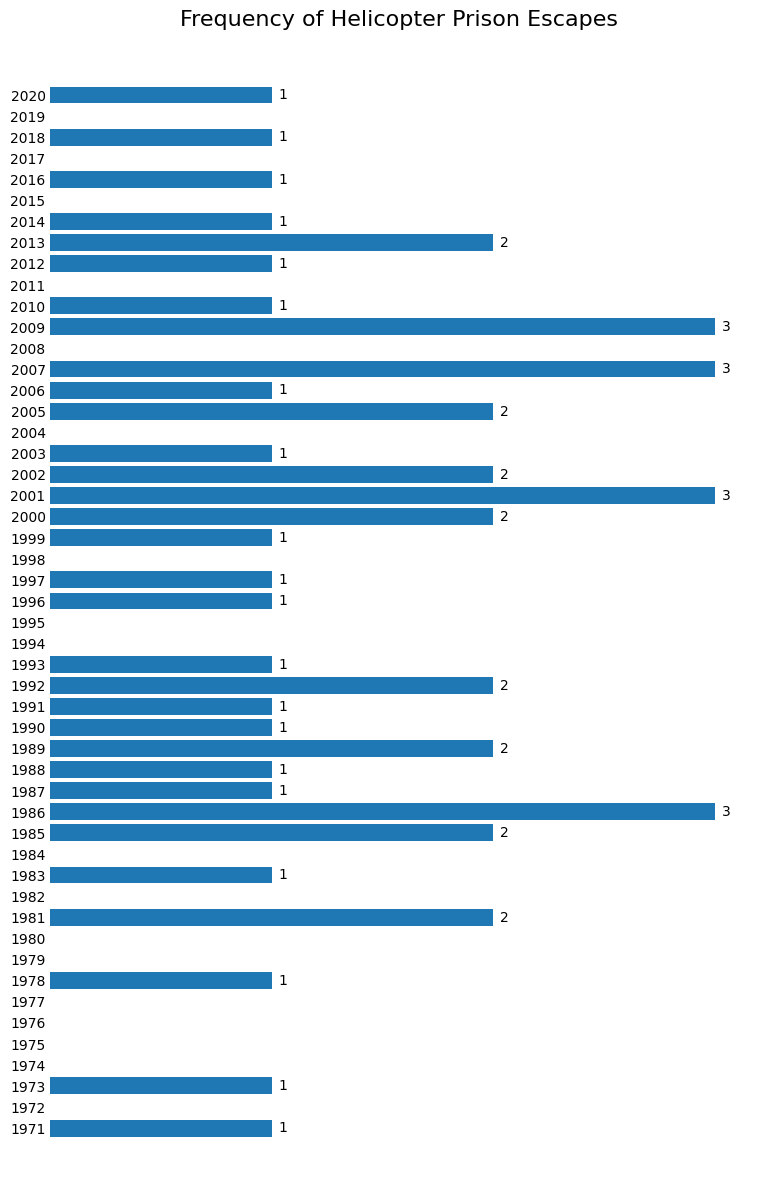

In [39]:
# Create a horizontal bar chart with Pyplot
year = list(freq_table.keys())
values = list(freq_table.values())

fig = plt.figure(figsize=(9,15))
plt.barh(year, values)
plt.title('Frequency of Helicopter Prison Escapes', size = 16)
ytix=range(min_year,max_year+1)
plt.yticks(ytix)
spines = ['top', 'right', 'bottom', 'left']
ax = plt.gca()
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0, labelbottom=False)

# Create value labels on horizontal bars
rectangles = ax.patches
for rectangle in rectangles:
    x_value = rectangle.get_width()
    y_value = rectangle.get_y() + rectangle.get_height() / 2
    space = 5
    ha = 'left'
    label = "{}".format(x_value)
    if x_value > 0:
        plt.annotate(
             label,
             (x_value, y_value),
             xytext=(space, 0),
            textcoords="offset points",
            va='center',
            ha=ha)
plt.show()

The greatest number of prison escape attempts by helicopter to occurred in a given year is three. This occurred on 4 different occasions in 1986, 2001, 2007 and 2009. 

## Escape Attempts by Country

Initialize a dictionary named `escapes_by_country` and use a loop to populate the dictionary. Count the frequency of escape attempts by helicopter for each country.


In [40]:
attempts_by_country = {}

for row in data:
    c = row[2]
    if c in attempts_by_country:
        attempts_by_country[c] += 1
    else:
        attempts_by_country[c] = 1

In [41]:
print(attempts_by_country)

{'Mexico': 1, 'Ireland': 1, 'United States': 8, 'France': 15, 'Canada': 4, 'Australia': 2, 'Brazil': 2, 'Italy': 1, 'United Kingdom': 2, 'Puerto Rico': 1, 'Chile': 1, 'Netherlands': 1, 'Greece': 4, 'Belgium': 4, 'Russia': 1}


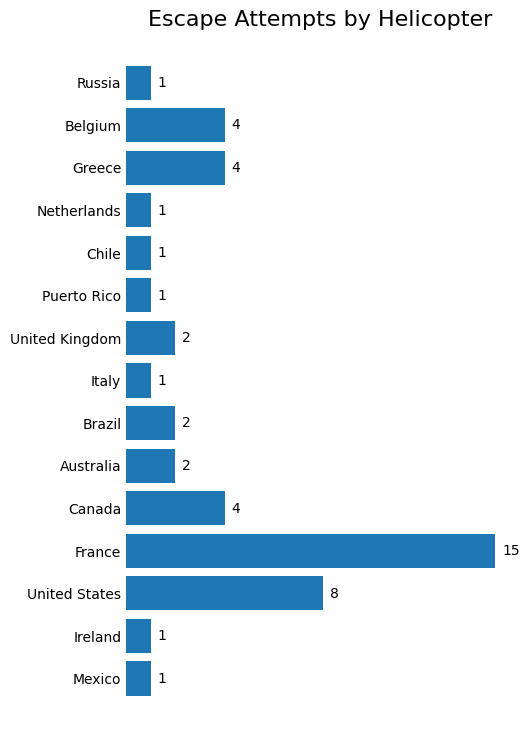

In [42]:
# Create a horizontal bar chart with Pyplot
country = list(attempts_by_country.keys())
values = list(attempts_by_country.values())

fig = plt.figure(figsize=(5,9))
plt.barh(country, values)
plt.title('Escape Attempts by Helicopter', size = 16)
spines = ['top', 'right', 'bottom', 'left']
ax = plt.gca()
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0, labelbottom=False)

# Create value labels on horizontal bars
rectangles = ax.patches
for rectangle in rectangles:
    x_value = rectangle.get_width()
    y_value = rectangle.get_y() + rectangle.get_height() / 2
    space = 5
    ha = 'left'
    label = "{}".format(x_value)
    if x_value > 0:
        plt.annotate(
             label,
             (x_value, y_value),
             xytext=(space, 0),
            textcoords="offset points",
            va='center',
            ha=ha)

plt.show()

From 1971 until 2020, the most prison escape attempts by helicopter occured in France. During this time, inmates attempted to escape fifteen times by helicopter.

## Successful Escapes

Use a loop to append each successful escape to a new list, `successful_escapes`. Use the new list to create a dictionary and construct another frequency table to identify the country with the most helicopter escapes.

In [45]:

successful_escapes = []

for row in data:
    success = row[3]
    if success == 'Yes':
        successful_escapes.append(row)

In [47]:
print(successful_escapes[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"], [1981, 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard Dupré Daniel Beaumont']]


In [51]:
escapes_by_country = {}

for row in successful_escapes:
    c = row[2]
    if c in escapes_by_country:
        escapes_by_country[c] += 1
    else:
        escapes_by_country[c] = 1

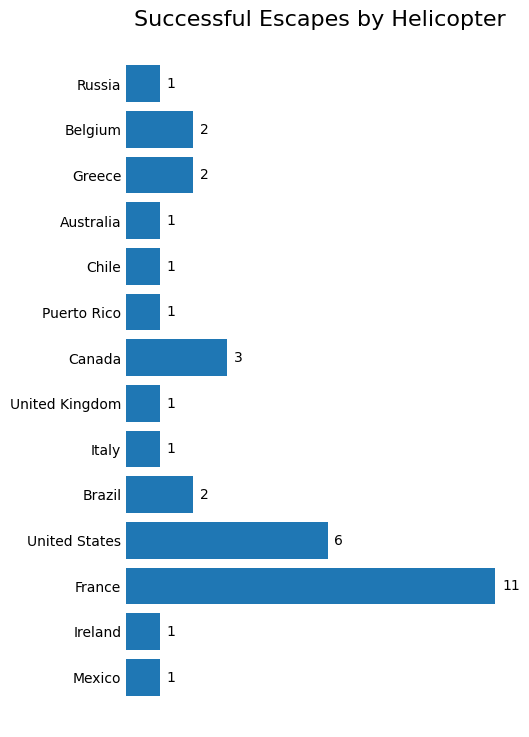

In [53]:
# Create a horizontal bar chart with Pyplot
country = list(escapes_by_country.keys())
values = list(escapes_by_country.values())

fig = plt.figure(figsize=(5,9))
plt.barh(country, values)
plt.title('Successful Escapes by Helicopter', size = 16)
spines = ['top', 'right', 'bottom', 'left']
ax = plt.gca()
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0, labelbottom=False)

# Create value labels on horizontal bars
rectangles = ax.patches
for rectangle in rectangles:
    x_value = rectangle.get_width()
    y_value = rectangle.get_y() + rectangle.get_height() / 2
    space = 5
    ha = 'left'
    label = "{}".format(x_value)
    if x_value > 0:
        plt.annotate(
             label,
             (x_value, y_value),
             xytext=(space, 0),
            textcoords="offset points",
            va='center',
            ha=ha)

plt.show()

From 1971 until 2020, the most successful prison escapes by helicopter occured in France. Surprisingly, prisoners were able to escape by helicopter on eleven seperate occassions. 